<a href="https://colab.research.google.com/github/zj71/Computer-Vision/blob/main/CV_Lab_Session_3_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Overview
Welcome to todays lab session. In this lab we will be looking more into 2D convolutions. How you can applying convolutional filters to images, and investigating edge detection. A lot of this functionality is possible through a variety of libraries. To keep things simple we'll stick to using numpy/scipy for low-level functionality and OpenCV for more complicated/CV specific stuff. This helps to give you a taste for of the main libraries you might need to use later.

This lab session will all be done by filling in the blanks in this Google Colab sheet. You'll need a google account to continue, but it's pretty straightforward to sign up if you don't have one already. 
The best thing to do would be to save a copy of this notebook in your personal google drive and edit it from there.

**Top Tips**
+ Check the documentation and links for help!
+ Remember assignment in Python is by reference! If you want to make a copy of a numpy object use [np.copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) to do a [deepcopy](https://docs.python.org/3/library/copy.html).
+ Calling [plt.show](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.show.html) shows whatever you've been trying to visualise this far as a single figure. If you want multiple axis on a single figure you can use [subplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html)

# Preparation
We are going to download some example images to work with, but you can upload your own images by following the colaboratory [guidance](https://colab.research.google.com/notebooks/io.ipynb). Personally, I think the easiest way to do it is to use the files menu on the side of the screen.

**Also, for this lab make sure you resize your images so they're not too big** This is because we would need to define some quite different parameters for the filters for them to work well.

In [ ]:
!wget "http://www.sussex.ac.uk/broadcast/images/uploads/2016/02/5848.item.jpg" -O sussex.jpg
!wget "http://users.sussex.ac.uk/~is321/sad_snowman.jpg" -O sad_snowman.jpg
!wget "http://users.sussex.ac.uk/~is321/bri_beach.jpg" -O bri_beach.jpg
!wget "https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG" -O meeting_house.jpg

--2021-02-25 09:44:06--  http://www.sussex.ac.uk/broadcast/images/uploads/2016/02/5848.item.jpg
Resolving www.sussex.ac.uk (www.sussex.ac.uk)... 139.184.32.51
Connecting to www.sussex.ac.uk (www.sussex.ac.uk)|139.184.32.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28074 (27K) [image/jpeg]
Saving to: ‘sussex.jpg’

sussex.jpg          100%[===================>]  27.42K  67.5KB/s    in 0.4s    

2021-02-25 09:44:07 (67.5 KB/s) - ‘sussex.jpg’ saved [28074/28074]

--2021-02-25 09:44:07--  http://users.sussex.ac.uk/~is321/sad_snowman.jpg
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395733 (386K) [image/jpeg]
Saving to: ‘sad_snowman.jpg’

sad_snowman.jpg     100%[===================>] 386.46K   473KB/s    in 0.8s    

2021-02-25 09:44:08 (473 KB/s) - ‘sad_snowman.jpg’ saved [395733/395733]

--2021-02

# Common Packages
We are also going to import some standard packages:
+ [opencv (cv2)](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) A general purpose package for computer vision.
+ [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot) A general purpose data visualising library
+ [numpy](https://numpy.org/doc/stable/) A numerical python package for arrays, linear algebra etc.
+ [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html) Where we'll take functions for [2d convolutions](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d) and [correlations](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d)

**Remmember** to convert any images we load to RGB from BGR

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from scipy.signal import convolve2d

# Inserted some magic code to make the figures slightly larger, these numbers can be tweaked
plt.rcParams['figure.figsize'] = [10, 5]

img = cv2.imread('./sussex.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_ss = cv2.imread('./sad_snowman.jpg')
img_ss = cv2.cvtColor(img_ss, cv2.COLOR_BGR2RGB)

img_bb = cv2.imread('./bri_beach.jpg')
img_bb = cv2.cvtColor(img_bb, cv2.COLOR_BGR2RGB)

img_mh = cv2.imread('./meeting_house.jpg')
img_mh = cv2.cvtColor(img_mh, cv2.COLOR_BGR2RGB)

# Let's resize the images to make them a bit smaller! Note the change in order
# of the shape using by the cv2.resize function
# Note that // does integer divison and always rounds down
img_mh = cv2.resize(img_mh, (img_mh.shape[1] // 6, img_mh.shape[0] // 6), interpolation=cv2.INTER_AREA)
img_ss = cv2.resize(img_ss, (img_ss.shape[1] // 8, img_ss.shape[0] // 8), interpolation=cv2.INTER_AREA)
img_bb = cv2.resize(img_bb, (img_bb.shape[1] // 8, img_bb.shape[0] // 8), interpolation=cv2.INTER_AREA)


# Applying basic 2D filters
In this section we'll look at writing our own convolutional kernels and applying them to the image using [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html). For now, stick with the 'same' option for the mode to keep the array at the same size.

1. Start by applying a simple horizontal differential kernel to a grayscale image with strong edges, like the meeting house photo. Take a look at the lecture slides for an example of the values in the kernel. This could be defined as a list, or a numpy array.
2. Now have a go at a vertical differnce kernel. Use the matplotlib [subplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html) functionality to draw the results side by side.
3. Experiment with the Gaussian filter [cv2.GaussianBlur](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html) for smoothing the images. Experiment with the parameter $\sigma$ and 'ksize' which is an odd tuple of integers defining the size of the convolutional kernel (why is it odd?). Note that you can get openCV to generate the kernel function for you to examine using cv2.getGaussianKernel() and you could display that as an image using plt.imshow. 


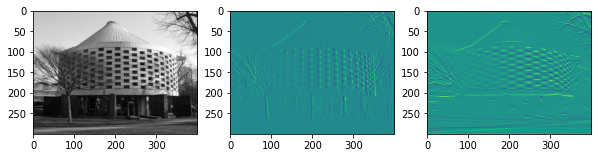

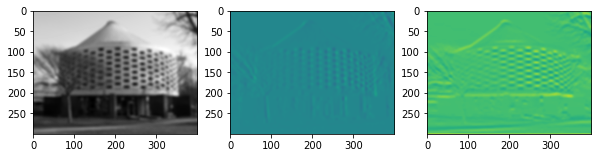

In [ ]:
from scipy.signal import convolve2d
import cv2
# Let's stick with using numpy to convert from RGB to gray
img_gray = np.mean(img_mh, axis=2)

# Let's calculate the horizontal gradients using this simple finite differencing 
# kernel with 1 row and 3 columns. Note I've defined as a list of lists, but it could
# also have been defined as an np.array
horz_grad = convolve2d(img_gray, [[-1, 0, 1]], mode='same')
# Let's calculate the vertical gradients using this simple finite differencing 
# kernel with 3 row and 1 columns. Note I've defined as a list of lists, but it could
# also have been defined as an np.array
vert_grad = convolve2d(img_gray, [[-1], [0], [1]], mode='same')

# Use subplot commands to draw all the corresponding figures next to each other
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(horz_grad)
plt.subplot(1,3,3)
plt.imshow(vert_grad)
plt.show()

# Next thing to do, is to try blurring the grayscale image using a Gaussian kernel
# We need to choose a kernel size, which defines the neighbourhood from which
# information is drawn. We also need to define a sigma parameter, which controls
# the level of blurring
smooth_img = cv2.GaussianBlur(img_gray, (11,11), 3.0)
# Apply the filters to the smoothed image as before and plot the results.
horz_grad = convolve2d(smooth_img, [[-1, 0, 1]], mode='same')
vert_grad = convolve2d(smooth_img, [[-1], [0], [1]], mode='same')
plt.subplot(1,3,1)
plt.imshow(smooth_img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(horz_grad)
plt.subplot(1,3,3)
plt.imshow(vert_grad)
plt.show()

# The Canny Edge Detector
Let's have a play with the Canny Edge detector on our images and see how it works. It has an easy to use implementations in OpenCV [cv2.Canny](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html) Take a look at the documentation for details on the arguments. ***Please note that OpenCV excepts the data to be in uint8**
4. Play with some of the arguments to Canny, in particlar the minimum and maximum values for the Hysteresis thresholding.
5. Try smoothing the image with a Gaussian blur prior to running the Canny filter, how does this effect your results?


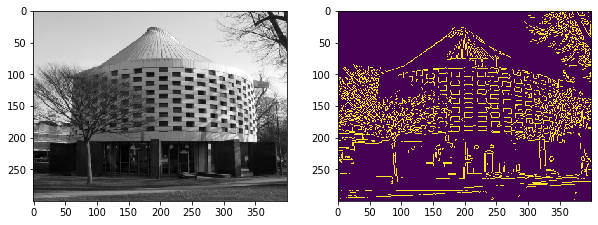

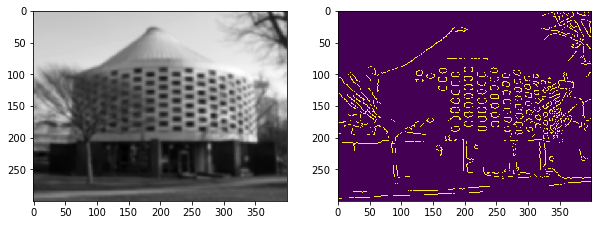

In [ ]:
# Let's stick with using numpy to convert from RGB to gray
# Note that the Canny edge detector requires out input to be in
# 8 bit unsigned characters, rather than floating point precision.
# We can cast our numpy array from float using np.uint8
img_gray_uint8 = np.uint8(np.mean(img_mh, axis=2))

plt.subplot(1,2,1)
plt.imshow(img_gray_uint8, cmap='gray')
plt.subplot(1,2,2)
# Run the canny edge detector with some magic numbers
im_canny = cv2.Canny(img_gray_uint8), 125, 200)
plt.imshow(im_canny)
plt.show()

# Smooth the input image using the Gaussian filter as before
smooth_img = cv2.GaussianBlur(img_gray_uint8, (11,11), 2.0)
plt.subplot(1,2,1)
plt.imshow(smooth_img, cmap='gray')
plt.subplot(1,2,2)
# Run the canny edge detector with some magic numbers
im_canny = cv2.Canny(smooth_img, 50, 100)
plt.imshow(im_canny)
plt.show()

# Addding some noise
6. Try adding some noise to the image using [numpy.random.randn](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html). Make sure you add a different random number for each pixel, rather than just a single number. Look at the arguments for randn to see how to do this.
7. Adding noise might have changed the data to be outside of the original possible range, why do you think this might be? Clip the noisy image to the original range of the data. 
8. Try scaling (multipling) the noise to increase the effect. How does this affect the gradient images that you calculate from the noisy images?
9. Try smoothing the noisy images with the Gaussian blur, and then calculating the edges? Does it improve the results?


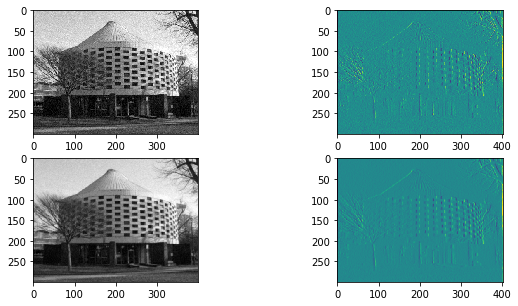

In [ ]:
# Let's stick with using numpy to convert from RGB to gray
img_gray = np.mean(img_mh, axis=2)

# Add some random noise that is the same shape as img_gray
# note that the * unpacks the tuple of the shape of gray and uses
# those as positional arguments to randn
# we also have some scaling constant for the noise level
noisy_img = img_gray + np.random.randn(*img_gray.shape) * 10.0

# Clip the noise to the correct range and convert uint8
noisy_img = np.uint8(np.clip(noisy_img, 0, 255))

# Run a sobel filter on the noisy image and a blurred version of the noisy image
# and look at the difference in. the results. 
plt.subplot(221)
plt.imshow(noisy_img, cmap='gray')
plt.subplot(222)
plt.imshow(convolve2d(noisy_img, [[-1, 0, 1]]))
plt.subplot(223)
smooth_img = np.uint8(cv2.GaussianBlur(noisy_img, (11,11), 0.75))
plt.imshow(smooth_img, cmap='gray')
plt.subplot(224)

plt.imshow(convolve2d(smooth_img, [[-1, 0, 1]]))

# Extensions
You don't have to do these, but if you complete the lab and want to learn more then give these a go! You also don't need to do them in any particular order.

+ Look at the [normalised cross-correlation example](https://colab.research.google.com/drive/14hczGbgCUOFRZhw5TdHwc6uohxm5r4ne?usp=sharing) and try and use this code with your own data.
+ Try applying histogram equalisation before edge detection, how does this improve things?
+ Take a look at very noisy photos, e.g. the cursed snowman or one of your own, and try applying the Gaussian filter to help detect good edges. Was our random noise a good approximation of an actually noisy photograph?
+ Experiment with edge detection on a higher resolution image, what do you need to change to your processing pipeline to get similar results?
+ In the cv2.resize function, what do you think the interpolation option does? how does changing this affect the images we're working with?


